In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

In [2]:
data = pd.read_csv('kc_house_data.csv') 

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.shape

(21613, 20)

In [6]:
data.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3

In [7]:
data.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0       

In [8]:
data.isnull().values.any()

False

In [9]:
dropColumns = ['id', 'date', 'zipcode'] 
data = data.drop(dropColumns, axis = 1) 

In [10]:
y = data['price'] 
X = data.drop('price', axis = 1) 

In [11]:
# Dividing the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [12]:
from sklearn.linear_model import LinearRegression
linearModel= LinearRegression()
linearModel.fit(X_train,y_train)

LinearRegression()

In [13]:
# Bulding and fitting the Linear Regression model 
# Dividing the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

# Evaluating the Linear Regression model 
print(linearModel.score(X_test, y_test)) 

0.6882821933526498


In [14]:
#Ridge(L2) Regression

In [15]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 69.09039943128886
0.5 : 69.0905755445855
0.75 : 69.090731945645
1.0 : 69.09086883699763
1.25 : 69.09098641885288
1.5 : 69.09108488912979
1.75 : 69.09116444348751
2.0 : 69.09122527535537


In [16]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 

# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test))

0.6877865382894041


In [17]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 69.09020889338368
0.5 : 69.0902143630499
0.75 : 69.09021980337022
1.0 : 69.09022521931553
1.25 : 69.0902306076068
1.5 : 69.09023596857335
1.75 : 69.09024130374364
2.0 : 69.09024661093868


In [18]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 

# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, y_test)) 

0.6879803137662652


In [19]:
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score(X_test, y_test), 
        ridgeModelChosen.score(X_test, y_test), 
        lassoModelChosen.score(X_test, y_test)] 

# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 

# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

Linear Regreesion : 0.6882821933526498
Ridge Regreesion : 0.6877865382894041
Lasso Regression : 0.6879803137662652


In [20]:
import matplotlib.pyplot as plt

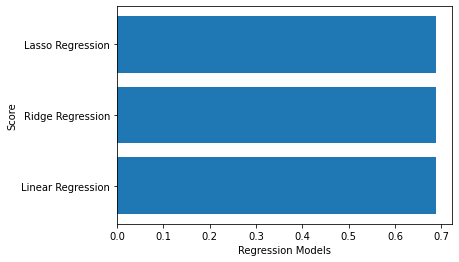

In [21]:
# Plotting the scores 
plt.barh(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 

In [22]:
import matplotlib.pyplot as plt

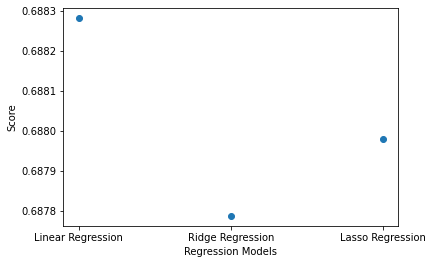

In [23]:
plt.scatter(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 

In [24]:
data.keys()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
print(data.keys())

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [26]:
data.describe

<bound method NDFrame.describe of           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_basement  yr_built  \
0               0     0          3      7  

In [28]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\janvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

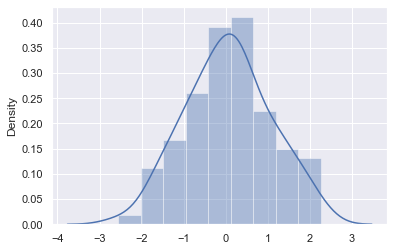

In [30]:
import seaborn as sns


sns.set()
np.random.seed(0)
x = np.random.randn(100)

sns.distplot(x)

C:\Users\janvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


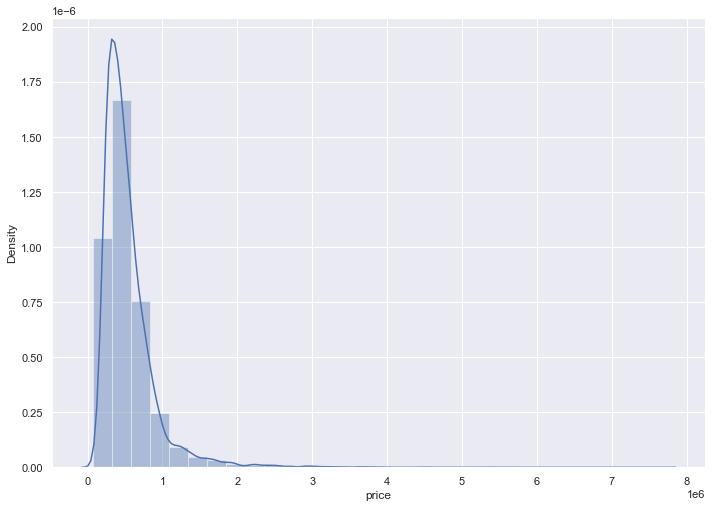

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['price'], bins=30)
plt.show()

<AxesSubplot:>

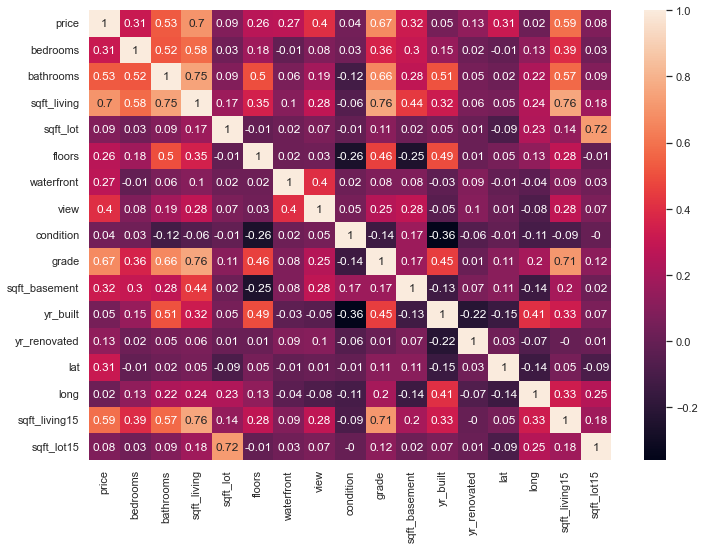

In [32]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#The correlation coefficient ranges from -1 to 1.

# If the value is close to 1, it means that there is a strong positive 
# correlation between the two variables. 

#When it is close to -1, the variables have a strong negative correlation.


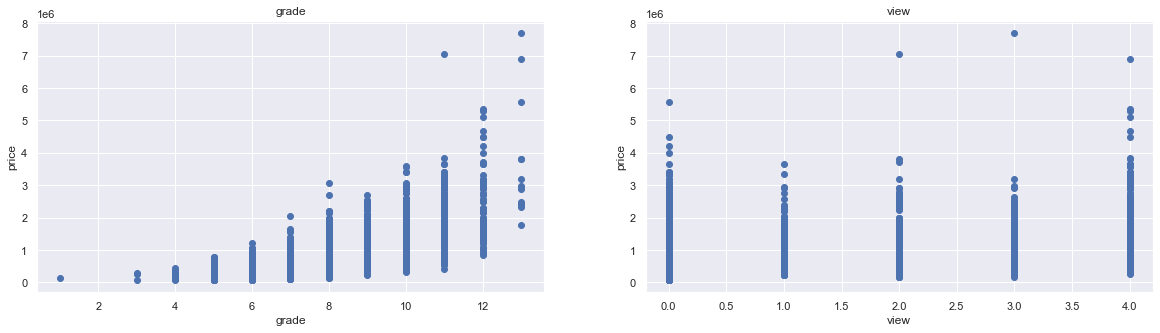

In [35]:
plt.figure(figsize=(20, 5))

features = ['grade', 'view']
target = data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [36]:

X = pd.DataFrame(np.c_[data['grade'], data['view']], columns = ['grade','view'])
Y = data['price']

In [37]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 2)
(4323, 2)
(17290,)
(4323,)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [47]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 259731.7617700696
R2 score is 0.4985363547262037


The model performance for testing set
--------------------------------------
RMSE is 257558.89139600992
R2 score is 0.5144761597357353


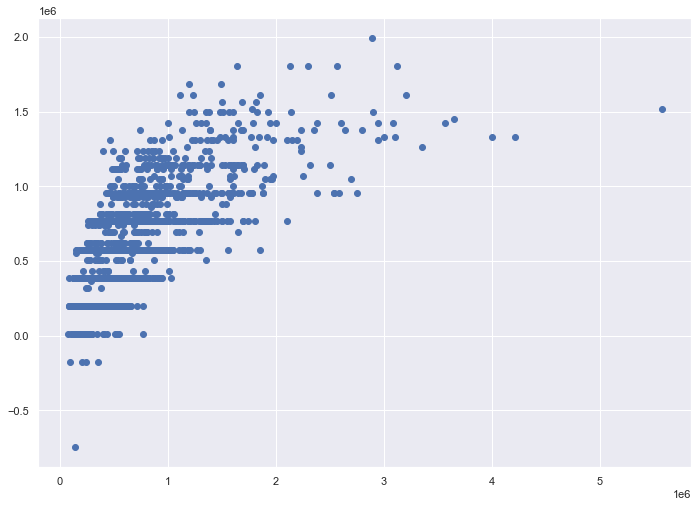

In [48]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()